In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# `LOADING A FEW REQUIRED LIBRARIES`

In [4]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import tarfile
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
import time
import math
import cv2
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import log_loss,confusion_matrix
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,MaxPooling2D,Conv2D,Dropout,BatchNormalization
from tensorflow.keras import backend as k 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from sklearn.datasets import load_files
import cv2
import pickle
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
from statistics import mode
from sklearn.utils.multiclass import unique_labels
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
import cv2

# `IMPORTING THE TRAIING FILES WITH LABEL MAPPING`

In [5]:
train_df=pd.read_csv('/kaggle/input/datathonindoml-2022/train_labels.csv')
train_df

,id,label
0,0,1
1,1,13
2,2,13
3,3,14
4,4,6
...,...,...
15995,15995,2
15996,15996,15
15997,15997,3
15998,15998,9


# `SETTING PATHS FOR FUTURE USE`

In [6]:
train_path='/kaggle/input/datathonindoml-2022/train/train/'
val_path='/kaggle/input/datathonindoml-2022/validation/validation/'

# `COLUMN NAMES` 

In [7]:
train_df.columns

Index(['id', 'label'], dtype='object')

In [9]:
# train_image = []
# for i in tqdm(range(train_df.shape[0])):
#     img = image.load_img('/kaggle/input/datathonindoml-2022/train/train/'+train_df['id'][i]+'.tif')
#     img = image.img_to_array(img)
#     img = img/255
#     train_image.append(img)
# X = np.array(train_image)

# `READING A FEW IMAGES`

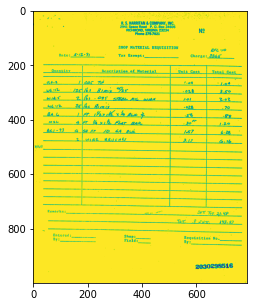

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5, 5])
img = plt.imread('/kaggle/input/datathonindoml-2022/train/train/0.tif')
plt.imshow(img)
plt.show()

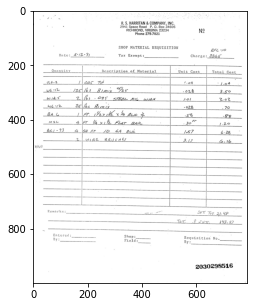

In [11]:
plt.figure(figsize=[5, 5])
img = cv2.imread('/kaggle/input/datathonindoml-2022/train/train/0.tif')
plt.imshow(img)

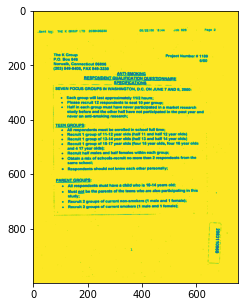

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5, 5])
img = plt.imread('/kaggle/input/datathonindoml-2022/train/train/1.tif')
plt.imshow(img)
plt.show()

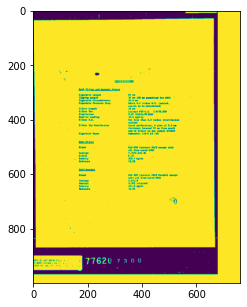

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5, 5])
img = plt.imread('/kaggle/input/datathonindoml-2022/train/train/50.tif')
plt.imshow(img)
plt.show()

# `GETTING ORIGNAL IMAGE SHAPE`

In [14]:
print('Image shape is: ',img.shape)

Image shape is:  (1000, 762)


# `USING TENSORFLOW FOR LOADING DATA USING IMAGEDATAGENERATOR WITH A TEST SPLIT OF 15%`

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [16]:
train_df

,id,label
0,0,1
1,1,13
2,2,13
3,3,14
4,4,6
...,...,...
15995,15995,2
15996,15996,15
15997,15997,3
15998,15998,9


# `CONVERTING IMAGE NAMES TO STRING TYPE FOR COMPATABILITY`

In [17]:
train_df['id'] = train_df['id'].astype(str)
train_df['label'] = train_df['label'].astype(str)
train_df['id'] =(train_df['id']+'.tif').astype(str)

In [18]:
# TRAIN AND VALIDATION GENERATOR FROM LOADED DATASET
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory = train_path,
    subset = 'training',
    x_col = 'id',
    y_col = 'label',
    target_size = (224,224),
    class_mode='sparse'
)

val_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory = train_path,
    subset = 'validation',
    x_col = 'id',
    y_col = 'label',
    target_size = (224,224),
    class_mode='sparse'
)

Found 13600 validated image filenames belonging to 16 classes.
Found 2400 validated image filenames belonging to 16 classes.


In [ ]:
x,y = next(train_generator)
x.shape, y.shape # input shape of one record is (331,331,3) , 32: is the batch size

In [ ]:
# # Store the data in X_train, y_train variables by iterating over the batches
# train_generator.reset()
# batch_size=50
# X_train, y_train = next(train_generator)
# for i in tqdm(range(int(len(train_generator)/batch_size)-1)): #1st batch is already fetched before the for loop.
#     img, label = next(train_generator)
#     X_train = np.append(X_train, img, axis=0 )
#     y_train = np.append(y_train, label, axis=0)
# print(X_train.shape, y_train.shape)

In [ ]:
y[0]

In [ ]:
plt.figure(figsize=[5, 5])
plt.imshow(x[0])

In [ ]:
a = train_generator.class_indices
class_names = list(a.keys())  # storing class/breed names in a list
 
 
def plot_images(img, labels):
    plt.figure(figsize=[15, 15])
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i])
        plt.title(int(labels[i]))
        plt.axis('off')
 
plot_images(x,y)

In [ ]:
import os
import itertools
import sys
import xml.etree.ElementTree as ET
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.applications.resnet50 import ResNet50
# from keras import backend as K
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from PIL import Image
from sklearn.metrics import (f1_score,
                             precision_score,
                             recall_score)

%matplotlib inline

In [ ]:
class_names 

In [ ]:
num_classes = len(class_names)
num_classes

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
plt.figure(figsize=(20, 5))
Y=train_df
total = len(Y)
ax=sns.countplot(x=Y.label, data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.2, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 10))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title('Distribution of classes in training data')
plt.show()

In [ ]:
sns.distplot(train_df.label)
plt.show()

In [ ]:
batch_size = 50
img_height = 224
img_width = 224

In [ ]:
num_classes=16

In [ ]:
# Importing keras InceptionRsnetv2 pretrained model on ImageNet
# using the ImageNet weight to initialize the model and fine tune using backpropagation(Transfer Learning) 
from tensorflow.keras import applications
from tensorflow.keras import regularizers

model=applications.InceptionResNetV2(
    weights = "imagenet", 
    include_top=False, 
    input_shape = (img_width, img_height, 3)
)

for layer in model.layers[:15]:
   layer.trainable = False
# Adding custom Layers 

x = model.output
x = Dropout(0.5)(x)
x = Flatten()(x)

output = Dense(num_classes, activation="softmax")(x)
model = Model(model.input, output)
model.summary()

In [ ]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
log=[]

In [ ]:
# Training for 30 epochs
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

checkpoint = ModelCheckpoint("inceptionresnet.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             period=1)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                              factor=0.2, 
                              patience=3, 
                              min_lr=0.0001,
                              mode='auto')

callbacks=[checkpoint,reduce_lr]

history=model.fit(train_generator,
                  epochs = 30,
                  validation_data = val_generator,
                  validation_steps =math.ceil(3000//(batch_size)),
                  callbacks = callbacks,
                  verbose=1)

log.append(history)

In [ ]:
model.save('resinception_1.h5')

In [ ]:
history1=model.fit(train_generator,
                   epochs = 30,
                   validation_data = val_generator,
                   validation_steps =math.ceil(10000//(batch_size*2)),
                   callbacks = callbacks,
                   verbose=1
                  )

log.append(history)

In [ ]:
model.save('resinception_85.h5')

In [ ]:
batch_size=50
history2=model.fit_generator(train_generator,
                             epochs = 30,
                             validation_data = val_generator,
                             validation_steps =math.ceil(10000//(batch_size*2)),
                             callbacks = callbacks,verbose=1
                            )

log.append(history)

In [ ]:
log

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

plt.title('Train Phase 1 - loss ')
plt.ylabel('loss')
plt.xticks([0,5,10,15,20,25,30])
plt.xlabel('epoch')
plt.legend(['train phase I', 
#             'test phase I',
           ], 
           loc='lower right')
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
# plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Test Phase 1 - loss ')
plt.ylabel('loss')
plt.xticks([0,5,10,15,20,25,30])
plt.xlabel('epoch')
plt.legend([
#     'train phase I', 
            'test phase I',
           ], 
           loc='lower right')
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))

plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])

plt.title('Train Phase 2 - loss ')
plt.ylabel('loss')
plt.xticks([0,5,10,15,20,25,30])
plt.xlabel('epoch')
plt.legend(['train phase II', 
            'test phase II'], loc='lower right')
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('InceptionReaNetv2 model(trained on whole images) loss ')
plt.ylabel('loss')
plt.xticks([0,5,10,15,20,25,30])
plt.xlabel('epoch')
plt.legend(['train phase I', 
#             'test phase I',
#             'train phase II', 
#             'test phase II',
            'train phase III', 
            'test phase III'], loc='lower right')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.plot(history1.history['accuracy'])
# plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy ')
plt.ylabel('Accuracy')
plt.xticks([0,5,10,15,20,25,30])
plt.xlabel('epoch')
plt.legend(['train phase I', 'test phase I','train phase III', 'test phase III'], loc='upper right')
plt.show()

In [ ]:
print('Maximum train accuracy: ',max(history2.history['accuracy']))
print('Maximum test accuracy: ',max(history2.history['val_accuracy']))

In [ ]:
print('Minimum train loss: ',max(history2.history['loss']))
print('Minimum test loss: ',max(history2.history['val_loss']))


# `IN OUR MODEL, WE WERE ABLE TO ACHIEVE TRAIN ACCURACY OF 95% AND TEST ACCURACY OF 72% AND RESPECTIVE LOSSES OF 0.3 AND 1.35 WITH 90 EPOCHS WHICH CAN FURTHER BE IMPROVED BY RUNNING FEW MORE EPOCHS USING TRANSFER LEARNING`

In [ ]:
model.save('final_model_v1.h5')

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255,featurewise_std_normalization=True)
test_data = datagen.flow_from_directory('/kaggle/input/datathonindoml-2022/validation/', classes=['validation'],target_size = (img_height, img_width),)

In [ ]:
def test(model_path, data_path):
    model = keras.models.load_model(model_path)
    datagen = ImageDataGenerator(rescale = 1./255,featurewise_std_normalization=True)
    test_data = datagen.flow_from_directory(data_path, classes=['validation'],
                                            target_size = (img_height, img_width),)
    x=model.predict(test_data)
    ypred=[]
    for i in range(len(x)):
        score = tf.nn.softmax(x[i])
        ypred.append(np.argmax(score))
    
    ids=test_data.filenames
    for i in range(len(ids)):
        ids[i]=ids[i].strip('.tif')
        ids[i]=ids[i].strip('validation/')
    submission_df = pd.DataFrame(columns = ['id', 'label'])
    submission_df['id'] = ids

    #make the predictions
    submission_df['label'] = ypred
    return submission_df.to_csv('submission.csv', index = False)
#     return 'predicted_label.csv'
    

In [ ]:
# model1_path = '../input/trained-model/models/final_model_v1.h5'
model2_path='./final_model_v1.h5'
data_path='/kaggle/input/datathonindoml-2022/validation/'
# test(model1_path, data_path)


In [ ]:
test(model2_path, data_path)